In [26]:
from numpy import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
def sample_beta_0(y, x, beta_1, tau, mu_0, tau_0):
    assert len(x)==len(y)
    N = len(y)
    precision=tau_0 + tau*N
    mean = tau_0*mu_0+tau*np.sum(y-beta_1*x)
    mean /= precision
    return random.normal(mean, 1/np.sqrt(precision)) # Obtener muestreo beta_0

In [20]:
def sample_beta_1(y, x, beta_0, tau, mu_1, tau_1):
    assert len(x)==len(y)
    precision=tau_1+tau*np.sum(x*x)
    mean=tau_1*mu_1+tau*np.sum((y-beta_0)*x)
    mean/=precision
    return random.normal(mean, 1/np.sqrt(precision)) 

In [21]:
def synthetic_data():
    beta_0_true=-1
    beta_1_true=2
    tau_true=1

    N=50
    x=random.uniform(low=0, high=4, size=N)
    y=random.normal(beta_0_true+beta_1_true*x, 1/np.sqrt(tau_true))

    syn_plt=plt.plot(x, y, 'o')
    plt.xlabel('x(uni. dist.)')
    plt.ylabel('y(normal dist.)')
    plt.grid(True)
    plt.show()

    return x, y, N

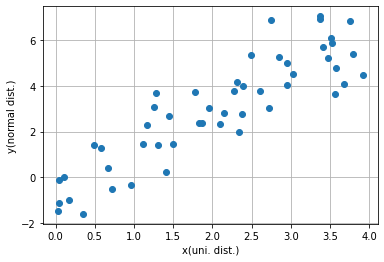

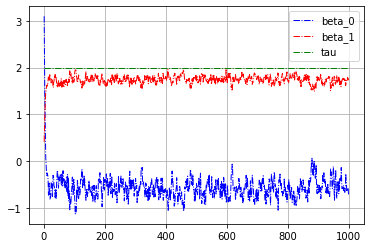

In [27]:
x, y, N = synthetic_data()

# Establecer el punto de partida de los parámetros
init={'beta_0':0, 'beta_1':0, 'tau':2}
#    
hypers={'mu_0': 0, 'tau_0':1, 'mu_1':0, 'tau_1':1, 'alpha':2, 'beta': 1}

def gibbs(y, x, iters, init, hypers):
    assert len(x)==len(y)
    beta_0, beta_1, tau=init['beta_0'], init['beta_1'], init['tau']

    param_rec = np.zeros((iters, 3)) # Registrar el cambio de parámetros

    for i in range(iters):
        beta_0=sample_beta_0(y, x, beta_1, tau, hypers['mu_0'], hypers['tau_0'])
        beta_1=sample_beta_1(y, x, beta_0, tau, hypers['mu_1'], hypers['tau_1'])
        param_rec[i, :]=np.array((beta_0, beta_1, tau))
    
    param_rec = pd.DataFrame(param_rec)
    param_rec.columns=['beta_0', 'beta_1', 'tau']

    return param_rec

def params():
    iters=1000 # Establecer el número de iteración
    param_rec = gibbs(y, x, iters, init, hypers)
    it = [*range(1, iters+1)]
    beta_0 = param_rec['beta_0'].values
    beta_1 = param_rec['beta_1'].values
    tau = param_rec['tau'].values

    plt.plot(it, beta_0, '-.', color='b', linewidth=1, label='beta_0')
    plt.plot(it, beta_1, '-.', color='r', linewidth=1, label='beta_1')
    plt.plot(it, tau, '-.', color='g', linewidth=1, label='tau')

    plt.grid(True)
    plt.legend(loc='best')
    plt.show()

params()

beta_0   -0.581656
beta_1    1.739919
tau       2.000000
dtype: float64
beta_0    0.182847
beta_1    0.076535
tau       0.000000
dtype: float64


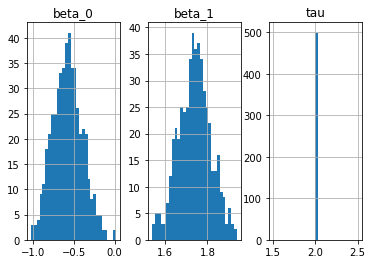

In [29]:
def trace_burnt():
    iters=1000
    param_rec = gibbs(y, x, iters, init, hypers)[500:-1]
    
    print(param_rec.median()) # Muestreo para obtener el número medio de parámetros
    print(param_rec.std())    # Muestreo de la desviación estándar de los parámetros
    hist_plot = param_rec.hist(bins=30, layout=(1, 3))
    plt.show()

trace_burnt()

# ejemplo 2

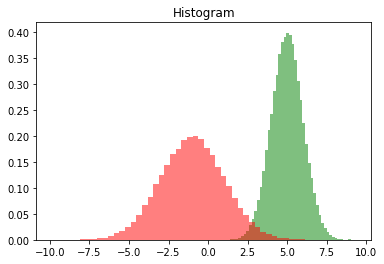

In [38]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
import random
import math
samplesource = multivariate_normal(mean=[5,-1], cov=[[1,1],[1,4]])

def p_ygivenx(x, m1, m2, s1, s2):
    return (random.normalvariate(m2 + rho * s2 / s1 * (x - m1), math.sqrt((1 - rho ** 2) * (s2**2))))

def p_xgiveny(y, m1, m2, s1, s2):
    return (random.normalvariate(m1 + rho * s1 / s2 * (y - m2), math.sqrt((1 - rho ** 2) * (s1**2))))

N = 5000
K = 20
x_res = []
y_res = []
z_res = []
m1 = 5
m2 = -1
s1 = 1
s2 = 2

rho = 0.5
y = m2

for i in range(N):
    for j in range(K):
        x = p_xgiveny(y, m1, m2, s1, s2)
        y = p_ygivenx(x, m1, m2, s1, s2)
        z = samplesource.pdf([x,y])
        x_res.append(x)
        y_res.append(y)
        z_res.append(z)

num_bins = 50
plt.hist(x_res, num_bins, density = 1, facecolor='green', alpha=0.5)
plt.hist(y_res, num_bins, density = 1, facecolor='red', alpha=0.5)
plt.title('Histogram')
plt.show()

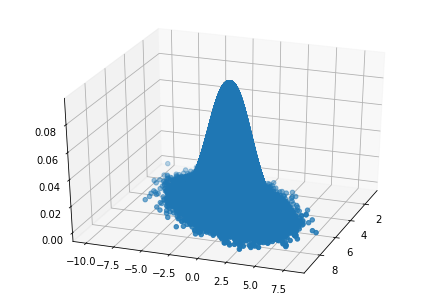

In [39]:
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
ax.scatter(x_res, y_res, z_res,marker='o')
plt.show()